In [2]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms

In [3]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 30
batch_size = 100
learning_rate = 0.001 

# Import MNIST dataset 

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=True, 
                                      transform=transforms.ToTensor(),  
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor()) 

/usr/local/Caskroom/miniconda/base/envs/pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459046073/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Data loader

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

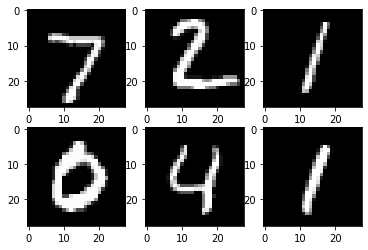

In [12]:
examples = iter(test_loader)
example_data, example_targets = examples.next()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show() 

# Model

In [6]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(input_size, hidden_size),
      nn.ReLU(),
      nn.Linear(hidden_size, num_classes),
    ) 
  def forward(self, x):
      x = x.reshape(-1, 28*28)
      return self.linear_relu_stack(x) 

In [7]:
model = NeuralNet()

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train

In [9]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):  
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    # images = images.reshape(-1, 28*28)
    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
  if (i+1) % 100 == 0:
    print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 

Epoch [1/30], Step[600/600], Loss: 0.0908
Epoch [2/30], Step[600/600], Loss: 0.1195
Epoch [3/30], Step[600/600], Loss: 0.0381
Epoch [4/30], Step[600/600], Loss: 0.0250
Epoch [5/30], Step[600/600], Loss: 0.0375
Epoch [6/30], Step[600/600], Loss: 0.0085
Epoch [7/30], Step[600/600], Loss: 0.0173
Epoch [8/30], Step[600/600], Loss: 0.0088
Epoch [9/30], Step[600/600], Loss: 0.0285
Epoch [10/30], Step[600/600], Loss: 0.0030
Epoch [11/30], Step[600/600], Loss: 0.0142
Epoch [12/30], Step[600/600], Loss: 0.0046
Epoch [13/30], Step[600/600], Loss: 0.0100
Epoch [14/30], Step[600/600], Loss: 0.0095
Epoch [15/30], Step[600/600], Loss: 0.0015
Epoch [16/30], Step[600/600], Loss: 0.0006
Epoch [17/30], Step[600/600], Loss: 0.0014
Epoch [18/30], Step[600/600], Loss: 0.0001
Epoch [19/30], Step[600/600], Loss: 0.0007
Epoch [20/30], Step[600/600], Loss: 0.0028
Epoch [21/30], Step[600/600], Loss: 0.0003
Epoch [22/30], Step[600/600], Loss: 0.0076
Epoch [23/30], Step[600/600], Loss: 0.0009
Epoch [24/30], Step[

# Test

In [10]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item() 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %') 

Accuracy of the network on the 10000 test images: 100.0 %
Accuracy of the network on the 10000 test images: 99.0 %
Accuracy of the network on the 10000 test images: 99.0 %
Accuracy of the network on the 10000 test images: 98.75 %
Accuracy of the network on the 10000 test images: 98.2 %
Accuracy of the network on the 10000 test images: 98.33333333333333 %
Accuracy of the network on the 10000 test images: 98.14285714285714 %
Accuracy of the network on the 10000 test images: 98.25 %
Accuracy of the network on the 10000 test images: 98.33333333333333 %
Accuracy of the network on the 10000 test images: 98.0 %
Accuracy of the network on the 10000 test images: 97.9090909090909 %
Accuracy of the network on the 10000 test images: 97.83333333333333 %
Accuracy of the network on the 10000 test images: 97.6923076923077 %
Accuracy of the network on the 10000 test images: 97.5 %
Accuracy of the network on the 10000 test images: 97.53333333333333 %
Accuracy of the network on the 10000 test images: 97.

In [11]:
from PIL import Image
img = Image.open('./test.jpg')
convert_tensor = transforms.Compose(
        [transforms.Grayscale(num_output_channels=1), transforms.ToTensor()]
        )
img = convert_tensor(img)
outputs = model(img.reshape(-1,28*28))
_, result = torch.max(outputs,1)
print(result.item())

6
